In [1]:
# import matplotlib
import matplotlib.pyplot as plt

#import random
import random
import pandas as pd
import numpy as np

# set random seed
random.seed(5)

* generate stationary time-series

In [8]:
index=pd.date_range("1/1/2021", "12/31/2021")
x=np.arange(n)
y_=np.random.uniform(-1,1,len(index))

mean=0
std=0.01
e = np.random.normal(mean, std, len(index))
#stationary series
y = y_ + e

In [14]:
stationary = pd.Series(data=y, index=index)
stationary.head()

2021-01-01   -0.786143
2021-01-02    0.516424
2021-01-03   -0.199787
2021-01-04   -0.086283
2021-01-05    0.230807
Freq: D, dtype: float64

* plot stationary series generated above

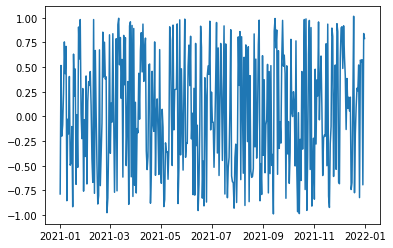

In [16]:
plt.plot(stationary)
plt.show()

* generate NON stationary time-series

In [17]:
for i in range(1,len(index)):
    y_[i] = y_[i-1] + e[i]
    
non_stationary = pd.Series(data=y_, index=index)
non_stationary.head()

2021-01-01   -0.787392
2021-01-02   -0.780878
2021-01-03   -0.790877
2021-01-04   -0.780894
2021-01-05   -0.784916
Freq: D, dtype: float64

* plot NON stationary series generated above

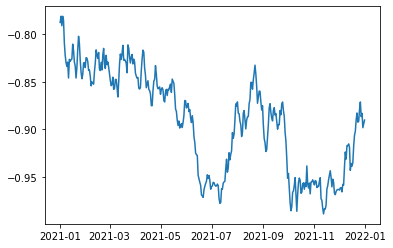

In [18]:
plt.plot(non_stationary)

* Create function 'ADF_Stationarity_Test' with input parameters `timeseries` and `significance_level` which: 
    * prints adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)


In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
def ADF_Stationarity_Test(timeseries, significance_level):
    results = adfuller(timeseries)
    print('ADF Statistic: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Critical Values:')
    for key, value in results[4].items():
        print('\t%s: %.3f' % (key, value))
        
    if results[1] < significance_level:
        print("Timeseries is stationary")
    else:
        print("Timeseries is not stationary")

* Apply function 'ADF_Stationarity_Test' to find out whether timeseries generated above are stationary.

In [23]:
ADF_Stationarity_Test(stationary, 0.05)

ADF Statistic: -12.588766
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
Timeseries is stationary


In [24]:
ADF_Stationarity_Test(non_stationary, 0.05)

ADF Statistic: -2.507554
p-value: 0.113647
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
Timeseries is not stationary


* Apply suitable transformation to make NON stationary time series stationary

In [28]:
non_stationary

2021-01-01   -0.787392
2021-01-02   -0.780878
2021-01-03   -0.790877
2021-01-04   -0.780894
2021-01-05   -0.784916
                ...   
2021-12-27   -0.886661
2021-12-28   -0.883249
2021-12-29   -0.898346
2021-12-30   -0.894488
2021-12-31   -0.890333
Freq: D, Length: 365, dtype: float64

In [29]:
non_stationary.shift(1)

2021-01-01         NaN
2021-01-02   -0.787392
2021-01-03   -0.780878
2021-01-04   -0.790877
2021-01-05   -0.780894
                ...   
2021-12-27   -0.871248
2021-12-28   -0.886661
2021-12-29   -0.883249
2021-12-30   -0.898346
2021-12-31   -0.894488
Freq: D, Length: 365, dtype: float64

In [37]:
non_stationary_differenced = non_stationary - non_stationary.shift(1)
non_stationary_differenced.fillna(method="bfill", inplace=True)

* plot transformed time series

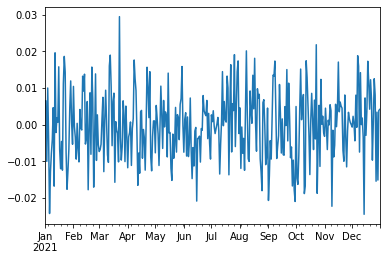

In [38]:
non_stationary_differenced.plot()
plt.show()

* Apply function 'ADF_Stationarity_Test' to find out whether transformed timeseries is stationary.

In [39]:
ADF_Stationarity_Test(non_stationary_differenced, 0.05)

ADF Statistic: -16.766726
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
Timeseries is stationary
